In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

%matplotlib inline

# Generer des données aléatoire avec du bruit 

In [25]:
X = np.random.uniform(0,100,100)
Y = X * 3.5 + np.random.normal(10,50,100)


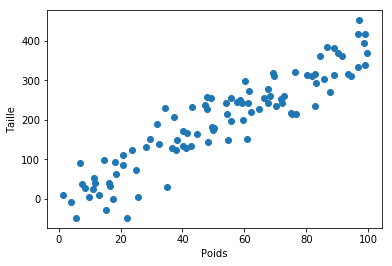

In [26]:
plt.scatter(X,Y)
plt.ylabel("Taille")
plt.xlabel("Poids")

## Fonction de d'erreur

In [27]:
def error(a):
    yPred      = X * a 
    yObserved  = Y 
    size       = len(X)
    
    diff = sum((yPred - yObserved)**2)/size
    return diff

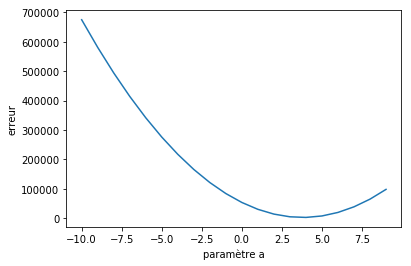

In [41]:
x    = range(-10,10)
y    = [error(a) for a in x]

plt.plot(x,y)
plt.xlabel("paramètre a")
plt.ylabel("erreur")

### Formule de la fonction objectif  à minimiser
$$ 
f(a) = \frac{1}{n}\sum_{i=0}^{n}(y_{i}-\bar{y_{i}})^{2} \\
f(a) = \frac{1}{n}\sum_{i=0}^{n}(y_{i}-ax_{i})^{2} \\
$$ 

### Calcul de la dérivé

$$ 
f(a) = \frac{1}{n}\sum_{i=0}^{n}(y_{i}-ax_{i})^{2} \\
f'(a) = \frac{1}{n}\sum_{i=0}^{n}(y_{i}^{2}-2y_{i}ax_{i} + (ax_{i})^{2} ) \\
f'(a) = \frac{1}{n}\sum_{i=0}^{n}(-2y_{i}ax_{i} + a^{2}x_{i}^{2} ) \\
f'(a) = \frac{-2}{n}\sum_{i=0}^{n}(x_{i}(y_{i} - ax_{i})  \\
$$

In [29]:
def derror(a):
    size = len(X)
    return -2/size * sum(X * (Y - a * X))

In [30]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

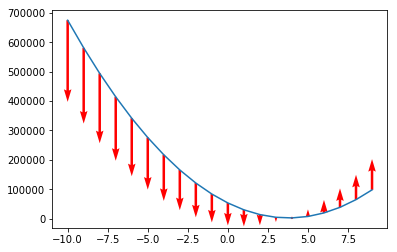

In [31]:
x    = range(-10,10)
y    = [error(a) for a in x]
yd   = [derror(a) for a in x]

plt.plot(x,y)


plt.quiver(x,y,1,yd, color='r', scale=400000)



    
    
    
    

### Gradient 

In [32]:
def gradient(a=-20, taux = 400000):
    
    e = 100.0 
    while True:
        
        e = derror(a) 
        g = e / taux
        
        if -0.5 <= e <= 0.5:
            return a
        
        a += -g
        
        print(a)
                
        
        

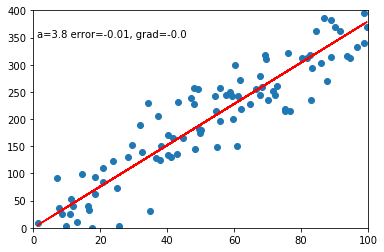

In [39]:
a = 0
taux = 100000

def animate(i):
    global a
    global taux
    e = derror(a) 
    g = e / taux
    a += -g
    text.set_text(str("a={} error={}, grad={}".format(round(a,2),round(e,2),round(g,5))))
    line.set_data(X, a*X)
    return line,

fig = plt.figure() # initialise la figure
line, = plt.plot([],[], color='red') 
text  = plt.text(1,350,"")

plt.xlim(0, 100)
plt.ylim(0,400)

plt.scatter(X,Y)


ani = animation.FuncAnimation(fig, animate, frames=200, blit=True, interval=90, repeat=False)
HTML(ani.to_html5_video())
